<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/trends/Notebook_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Ejecutar librerias { run: "auto", display-mode: "form" }
from matplotlib.font_manager import json_dump
from numpy.matrixlib.defmatrix import N
from operator import truediv
import numpy as np
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
from IPython.display import Image
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [9]:
#@title CARGA DE DATA_SET 
Url = "https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/main/MUESTRA%20TOTAL%201022.csv" #@param {type:"string"}
datos = pd.read_csv(Url,sep=";",decimal=",")
df=pd.DataFrame(datos)
dfx=df.copy()
dfx.Time= dfx.Date.values+' '+dfx.Time.values  
for i in range (len(dfx['FQI151'])):
     if (dfx['FQI151'].values[i])<=0:
         dfx['FQI151'].values[i]=0
         #print(dfx['FQI151'].values[i])
#print(dfx.loc[dfx['FQI151']==0])
#print(dfx)

In [15]:
#@title Analisis rapidos del data_set completo
a=np.array(round(dfx.FQI161.describe(),2))
b=np.array(round(dfx.PIR161.describe(),2))
c=np.array(round(dfx.FQI165.describe(),2))
d=np.array(round(dfx.FQI169.describe(),2))
e=np.array(round(dfx.FQI177.describe(),2))
f=np.array(round(dfx.FQI173.describe(),2))
g=np.array(round(dfx.FQI151.describe(),2))
h=np.array(["count","mean","std","min","25%","50%","75%","max"])
R=np.array(["Features","FQI161","PIR161","FQI165","FQI169","FQI177","FQI173","FQI151"])
ke=np.array([h,a,b,c,d,e,f,g])
dfD= pd.DataFrame(ke.T,columns=R)  

def TABLA1 (R):
 fig_A1 = go.Figure(data=[go.Table(
    header=dict(values=list(R.columns),
                fill_color='lightgray',
                align='left'),
    cells=dict(values=[R.Features,R.FQI161, R.PIR161,R.FQI165,R.FQI169,R.FQI177,R.FQI173,R.FQI151],
               fill_color='beige',
               align='left'))
  ])
 fig_A1.show()

print('Analisis rapidos.' )
TABLA1(dfD)
#@title Maximos y minimos de intervalo dado:
nvalue = 4 #@param {type:"number"}
Instrumento = 'FQI161' #@param {type:"raw"}
dfx = dfx #@param {type:"raw"}
dfmax=dfx.nlargest(nvalue,Instrumento)
dfmin=dfx.nsmallest(nvalue,Instrumento)
dfmax

Analisis rapidos.


,indice,Date,Time,FQI161,PIR161,FQI165,FQI169,FQI177,FQI173,FQI151
22992,22993,24/10/2022,24/10/2022 22:47:59,14195.78,12.90,6410.80,5051.89,286.56,177.00,2269.53
23682,23683,25/10/2022,25/10/2022 16:02:59,14093.94,12.80,6400.47,5039.89,475.56,150.90,2027.13
20721,20722,22/10/2022,22/10/2022 14:01:29,14043.71,11.58,6290.08,5038.89,195.27,124.88,2394.59
26839,26840,28/10/2022,28/10/2022 22:58:29,14008.88,12.70,6361.47,5010.67,323.93,164.38,2148.43


Cantidad de items sampleados:  29760
Fecha de la muestra:  1/10/2022 al 31/10/2022


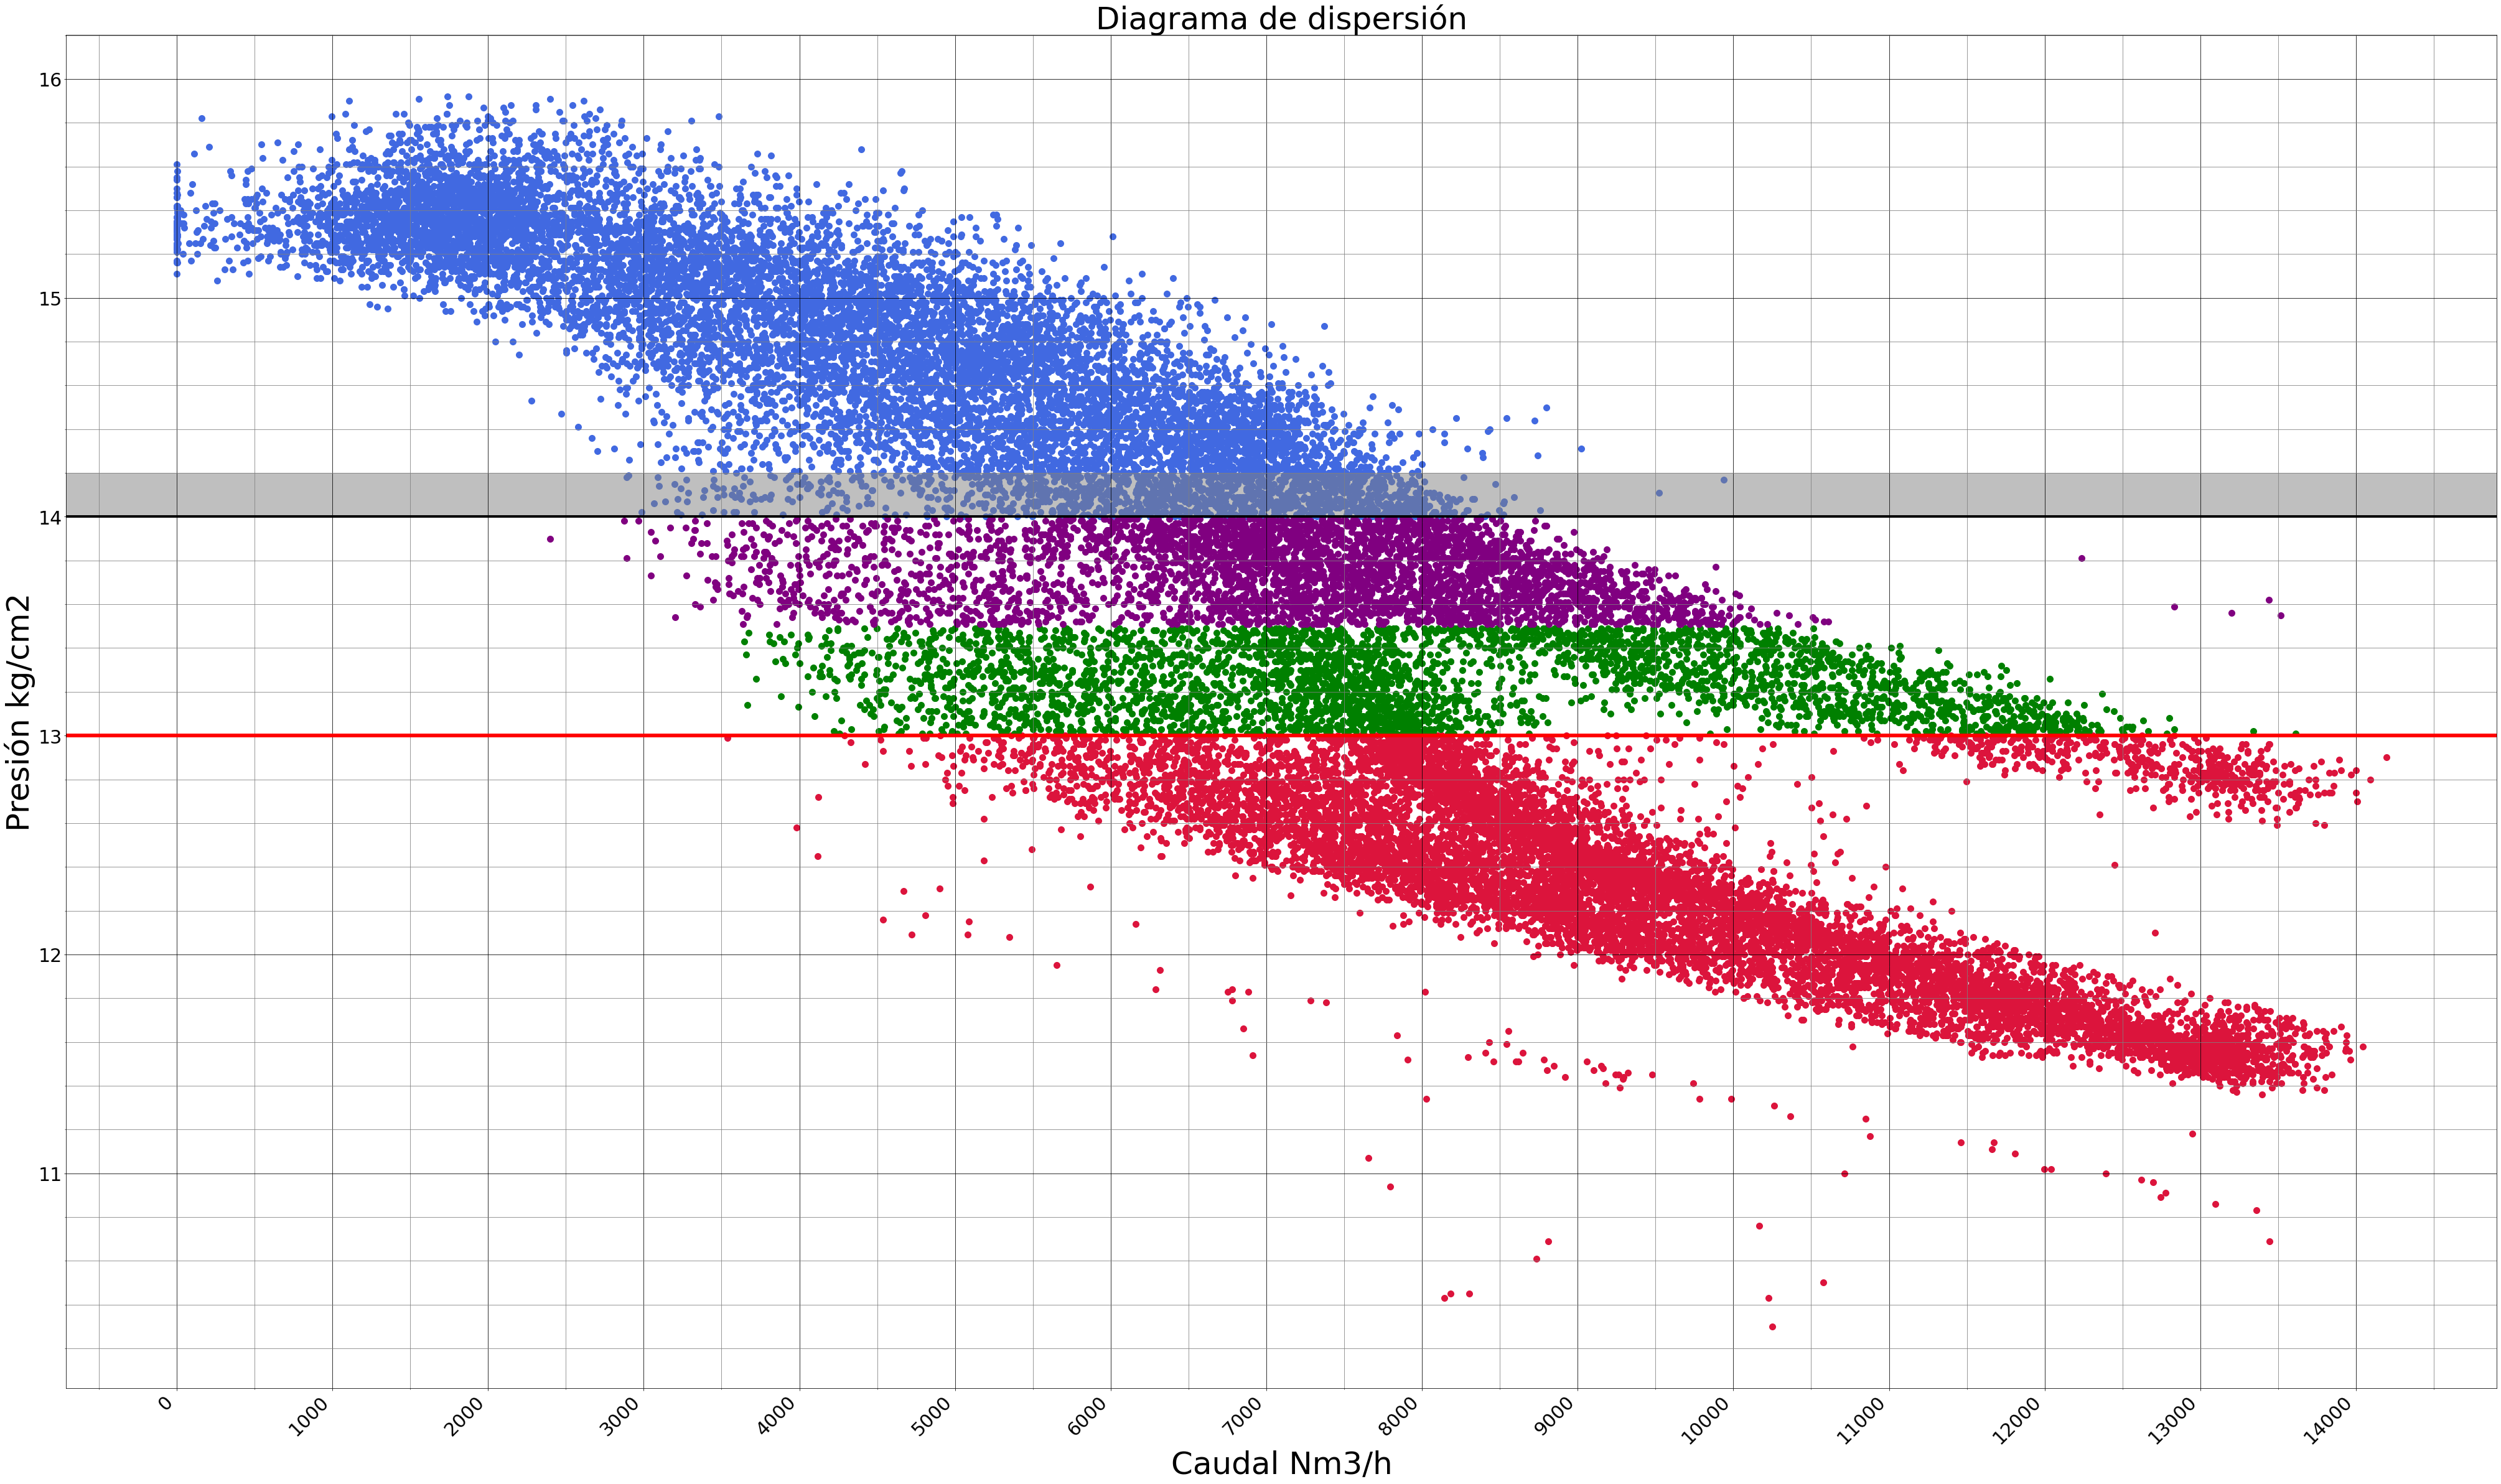

In [20]:
from pandas.core.aggregation import reconstruct_func
from io import DEFAULT_BUFFER_SIZE
#@title Dispersion de muestra 

InstrumentoParametro = 'PIR161' #@param {type:"raw"}
x = 'FQI161' #@param {type:"raw"}
y = 'PIR161' #@param {type:"raw"}
text='Caudal Nm3/h'
text1='Presión kg/cm2'
choice=False
Secciones = "13;13.5;14" #@param {type:"string"}
zoom = True #@param {type:"boolean"}
Intervalo = "14;14.2" #@param {type:"string"}
labels=['dfa','dfb','dfc','dfd']
Rangos=np.array(np.mat(Secciones))
Rangos1=np.array(np.mat(Intervalo))
print('Cantidad de items sampleados: ', len(dfx.index))

print('Fecha de la muestra: ',dfx.Date[0], 'al',dfx.Date[(len(dfx.index)-1)])

fig1, ax = plt.subplots(1, figsize=(70,40))

#--------Muestreo color------
dfa = dfx.loc[dfx.loc[:,InstrumentoParametro] <= Rangos[0][0]]
dfb1= dfx.loc[dfx.loc[:,InstrumentoParametro] < Rangos[1][0]]
dfb= dfb1.loc[dfb1.loc[:,InstrumentoParametro] > Rangos[0][0]]
dfc1= dfx.loc[dfx.loc[:,InstrumentoParametro] < Rangos[2][0]]
dfc= dfc1.loc[dfc1.loc[:,InstrumentoParametro] > Rangos[1][0]]
dfd= dfx.loc[dfx.loc[:,InstrumentoParametro] >= Rangos[2][0]]



ax.scatter(dfa[x],dfa[y],color='crimson',s=100,label=labels[0])
ax.scatter(dfb[x],dfb[y],color='green',s=100,label=labels[1])
ax.scatter(dfd[x],dfd[y],color='royalblue',s=100,label=labels[2])
ax.scatter(dfc[x],dfc[y],color='purple',s=100,label=labels[3])

#------- muetra zoom---------------
if zoom == True:
  dfz1= dfx.loc[dfx.loc[:,InstrumentoParametro] < Rangos1[1][0]]
  dfz= dfz1.loc[dfz1.loc[:,InstrumentoParametro] >= Rangos1[0][0]]
  ax.axhspan(Rangos1[0][0],Rangos1[1][0],color='grey',alpha=0.5,label='dfz')
    
labels = ax.get_xticklabels()
labels1= ax.get_yticklabels()
plt.setp(labels, rotation=45,fontsize=30, horizontalalignment='right')
plt.setp(labels1,fontsize=30, horizontalalignment='right')

ax.xaxis.set_major_locator(MultipleLocator(1000),)
ax.xaxis.set_minor_locator(MultipleLocator(500),)
ax.axes.grid(True, which='minor',color='grey',axis='both')
ax.axes.grid(True, which='major',color='black',axis='both')

ax.yaxis.set_minor_locator(MultipleLocator(0.2),)
ax.set_title('Diagrama de dispersión',fontsize=50)
ax.axhline(y=14,linewidth=4,color='black')
ax.axhline(y=13,linewidth=6,color='red')
if x== 'FQI161':
   ax.set_xlabel(text,fontsize=50)
   ax.set_ylabel(text1,fontsize=50)
 
else :
   ax.set_xlabel(text1,fontsize=50)
   ax.set_ylabel(text,fontsize=50)